# <center> **Classification Therapeutic Class using XGBoost**
# <center> **math&gacoan**


*   Adinda Syarifatul Muna
*  Aqila Malfa Zahira
* Nabella Yunita Sari




# **Import Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [5]:

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score


## Import Dataset

In [6]:
df_250_medicine=pd.read_csv('/content/drive/MyDrive/math&gacoan_CodeDashboardFinpro/Dataset untuk Notebook apabila diperlukan/medicine_dataset.csv')
df_250_medicine=df_250_medicine.drop("id",axis=1)

<ipython-input-6-e4b2056deee9>:1: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_250_medicine=pd.read_csv('/content/drive/MyDrive/math&gacoan_CodeDashboardFinpro/Dataset untuk Notebook apabila diperlukan/medicine_dataset.csv')


In [7]:
df_az_medicine=pd.read_csv('//content/drive/MyDrive/math&gacoan_CodeDashboardFinpro/Dataset untuk Notebook apabila diperlukan/A_Z_medicines_dataset_of_India.csv')
df_az_medicine=df_az_medicine.drop("id",axis=1)

# **Data Cleaning**

## Remove Data Duplikasi

In [8]:
#remove data duplikasi
df_250_medicine = df_250_medicine.drop_duplicates(subset='name', keep='first')
df_az_medicine = df_az_medicine.drop_duplicates(subset='name', keep='first')


## Merger Kedua Dataset

In [9]:
#ubah ke lowercase
df_250_medicine.loc[:, 'name']=df_250_medicine['name'].str.lower()
df_az_medicine.loc[:, 'name']=df_az_medicine['name'].str.lower()

#proses merge
df = pd.merge(df_250_medicine, df_az_medicine, left_on='name', right_on='name',how='inner')

#rename beberapa kolom
df = df.rename(columns={'price(₹)' : 'Price', 'manufacturer_name': 'Manufacturer', 'pack_size_label': 'Packing', 'short_composition1': 'Composition1', 'short_composition2': 'Composition2'})

In [10]:
df.head()

,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,sideEffect3,...,Habit Forming,Therapeutic Class,Action Class,Price,Is_discontinued,Manufacturer,type,Packing,Composition1,Composition2
0,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,NaN,...,No,ANTI INFECTIVES,NaN,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,...,No,ANTI INFECTIVES,Macrolides,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,Upset stomach,...,No,RESPIRATORY,NaN,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,Nausea,...,No,RESPIRATORY,H1 Antihistaminics (second Generation),218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,NaN,...,No,RESPIRATORY,H1 Antihistaminics (First Generation),10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN


In [11]:
df.shape

(221468, 64)

# **Feature Engineering**

## Pengecekan Missing Values

In [12]:
df.isnull().sum()

,0
name,0
substitute0,8732
substitute1,13066
substitute2,16398
substitute3,19493
...,...
Manufacturer,0
type,0
Packing,0
Composition1,0


## Ekstraksi Fitur yang akan dipakai

In [13]:
df_use = df[["Composition1", "Composition2", "Chemical Class", "Action Class", "Therapeutic Class", "substitute0"]]
df_use.head()


,Composition1,Composition2,Chemical Class,Action Class,Therapeutic Class,substitute0
0,Amoxycillin (500mg),Clavulanic Acid (125mg),NaN,NaN,ANTI INFECTIVES,Penciclav 500 mg/125 mg Tablet
1,Azithromycin (500mg),NaN,Macrolides,Macrolides,ANTI INFECTIVES,Zithrocare 500mg Tablet
2,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml),NaN,NaN,RESPIRATORY,Solvin LS Syrup
3,Fexofenadine (120mg),NaN,Diphenylmethane Derivative,H1 Antihistaminics (second Generation),RESPIRATORY,Lcfex Tablet
4,Pheniramine (25mg),NaN,Pyridines Derivatives,H1 Antihistaminics (First Generation),RESPIRATORY,Eralet 25mg Tablet


## Imputasi Missing Values

In [14]:
df_use.isnull().sum()

,0
Composition1,0
Composition2,123157
Chemical Class,98804
Action Class,98566
Therapeutic Class,63
substitute0,8732


In [15]:
modus_chemical = df_use['Chemical Class'].mode()[0]
modus_action = df_use['Action Class'].mode()[0]
modus_substitute = df_use['substitute0'].mode()[0]

df_use['Chemical Class'].fillna(modus_chemical, inplace=True)
df_use['Action Class'].fillna(modus_action, inplace=True)
df_use['substitute0'].fillna(modus_substitute, inplace=True)



<ipython-input-15-3a8277d22528>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['Chemical Class'].fillna(modus_chemical, inplace=True)
<ipython-input-15-3a8277d22528>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['Action Class'].fillna(modus_action, inplace=True)
<ipython-input-15-3a8277d22528>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['substitute0'].fillna(modus_substitute, inplace=True)


In [16]:
# Gabung composition2 ke composition1
df_use['Composition1'] = df_use['Composition1'] + df_use['Composition2'].fillna('').apply(lambda x: ', ' + x if x != '' else '')

# Hapus kolom short_composition2
df_use = df_use.drop(columns=['Composition2'])

# Rename kolom Composition1 jadi Composition
df_use.rename(columns={'Composition1': 'Composition'}, inplace=True)

# Updated dataframe
df_use.head()


<ipython-input-16-f9e09d3daa6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['Composition1'] = df_use['Composition1'] + df_use['Composition2'].fillna('').apply(lambda x: ', ' + x if x != '' else '')


,Composition,Chemical Class,Action Class,Therapeutic Class,substitute0
0,"Amoxycillin (500mg) , Clavulanic Acid (125mg)",Fluoroquinolone,Cephalosporins: 3 generation,ANTI INFECTIVES,Penciclav 500 mg/125 mg Tablet
1,Azithromycin (500mg),Macrolides,Macrolides,ANTI INFECTIVES,Zithrocare 500mg Tablet
2,"Ambroxol (30mg/5ml) , Levosalbutamol (1mg/5ml)",Fluoroquinolone,Cephalosporins: 3 generation,RESPIRATORY,Solvin LS Syrup
3,Fexofenadine (120mg),Diphenylmethane Derivative,H1 Antihistaminics (second Generation),RESPIRATORY,Lcfex Tablet
4,Pheniramine (25mg),Pyridines Derivatives,H1 Antihistaminics (First Generation),RESPIRATORY,Eralet 25mg Tablet


In [17]:
df_use.isnull().sum()

,0
Composition,0
Chemical Class,0
Action Class,0
Therapeutic Class,63
substitute0,0


In [18]:
# Hapus baris yang kolom Therapeutic Classnya kosong
df_use = df_use.dropna(subset=['Therapeutic Class'])




In [19]:
df_use.head()

,Composition,Chemical Class,Action Class,Therapeutic Class,substitute0
0,"Amoxycillin (500mg) , Clavulanic Acid (125mg)",Fluoroquinolone,Cephalosporins: 3 generation,ANTI INFECTIVES,Penciclav 500 mg/125 mg Tablet
1,Azithromycin (500mg),Macrolides,Macrolides,ANTI INFECTIVES,Zithrocare 500mg Tablet
2,"Ambroxol (30mg/5ml) , Levosalbutamol (1mg/5ml)",Fluoroquinolone,Cephalosporins: 3 generation,RESPIRATORY,Solvin LS Syrup
3,Fexofenadine (120mg),Diphenylmethane Derivative,H1 Antihistaminics (second Generation),RESPIRATORY,Lcfex Tablet
4,Pheniramine (25mg),Pyridines Derivatives,H1 Antihistaminics (First Generation),RESPIRATORY,Eralet 25mg Tablet


## Pengecekan Missing Values pada fitur yang digunakan

In [20]:
df_use.isnull().sum()

,0
Composition,0
Chemical Class,0
Action Class,0
Therapeutic Class,0
substitute0,0


In [21]:
df_use.head()

,Composition,Chemical Class,Action Class,Therapeutic Class,substitute0
0,"Amoxycillin (500mg) , Clavulanic Acid (125mg)",Fluoroquinolone,Cephalosporins: 3 generation,ANTI INFECTIVES,Penciclav 500 mg/125 mg Tablet
1,Azithromycin (500mg),Macrolides,Macrolides,ANTI INFECTIVES,Zithrocare 500mg Tablet
2,"Ambroxol (30mg/5ml) , Levosalbutamol (1mg/5ml)",Fluoroquinolone,Cephalosporins: 3 generation,RESPIRATORY,Solvin LS Syrup
3,Fexofenadine (120mg),Diphenylmethane Derivative,H1 Antihistaminics (second Generation),RESPIRATORY,Lcfex Tablet
4,Pheniramine (25mg),Pyridines Derivatives,H1 Antihistaminics (First Generation),RESPIRATORY,Eralet 25mg Tablet


# **Data Preprocessing**

## Encoding Dataset

In [22]:

# One-Hot Encoding untuk fitur kategori
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df_use[['Composition', 'Chemical Class', 'Action Class', 'substitute0']])

# Label Encoding untuk target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_use['Therapeutic Class'])

print("Shape of X_encoded:", X_encoded.shape)
print("Shape of y_encoded:", y_encoded.shape)

print('X encoded:', X_encoded)
print('y encoded:', y_encoded)

Shape of X_encoded: (221405, 32089)
Shape of y_encoded: (221405,)
X encoded:   (0, 750)	1.0
  (0, 11886)	1.0
  (0, 12538)	1.0
  (0, 26258)	1.0
  (1, 1252)	1.0
  (1, 11997)	1.0
  (1, 12660)	1.0
  (1, 31857)	1.0
  (2, 478)	1.0
  (2, 11886)	1.0
  (2, 12538)	1.0
  (2, 28602)	1.0
  (3, 5185)	1.0
  (3, 11851)	1.0
  (3, 12604)	1.0
  (3, 22233)	1.0
  (4, 9089)	1.0
  (4, 12236)	1.0
  (4, 12603)	1.0
  (4, 18964)	1.0
  (5, 7963)	1.0
  (5, 11886)	1.0
  (5, 12538)	1.0
  (5, 18733)	1.0
  (6, 750)	1.0
  :	:
  (221398, 16603)	1.0
  (221399, 2257)	1.0
  (221399, 11886)	1.0
  (221399, 12538)	1.0
  (221399, 30278)	1.0
  (221400, 2417)	1.0
  (221400, 11747)	1.0
  (221400, 12538)	1.0
  (221400, 27038)	1.0
  (221401, 4309)	1.0
  (221401, 11718)	1.0
  (221401, 12522)	1.0
  (221401, 17964)	1.0
  (221402, 6105)	1.0
  (221402, 12166)	1.0
  (221402, 12603)	1.0
  (221402, 20705)	1.0
  (221403, 1252)	1.0
  (221403, 11997)	1.0
  (221403, 12660)	1.0
  (221403, 32041)	1.0
  (221404, 3513)	1.0
  (221404, 11673)	1.0
  

In [26]:
import pandas as pd

# Asumsi bahwa `encoded_classes` adalah array atau daftar yang berisi nama-nama kelas
encoded_classes = label_encoder.classes_

# Buat dataframe dari kelas yang di-encode
df_encoded_classes = pd.DataFrame({
    'Label': range(len(encoded_classes)),
    'Class Name': encoded_classes
})

# Tampilkan dataframe
display(df_encoded_classes)


,Label,Class Name
0,0,ANTI DIABETIC
1,1,ANTI INFECTIVES
2,2,ANTI MALARIALS
3,3,ANTI NEOPLASTICS
4,4,BLOOD RELATED
5,5,CARDIAC
6,6,DERMA
7,7,GASTRO INTESTINAL
8,8,GYNAECOLOGICAL
9,9,HORMONES


## Split Data Train dan Data Test

In [ ]:
# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


# **EDA**

## Statistik Deskriptif

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221468 entries, 0 to 221467
Data columns (total 64 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               221468 non-null  object 
 1   substitute0        212736 non-null  object 
 2   substitute1        208402 non-null  object 
 3   substitute2        205070 non-null  object 
 4   substitute3        201975 non-null  object 
 5   substitute4        199330 non-null  object 
 6   sideEffect0        221468 non-null  object 
 7   sideEffect1        212605 non-null  object 
 8   sideEffect2        204677 non-null  object 
 9   sideEffect3        185368 non-null  object 
 10  sideEffect4        146947 non-null  object 
 11  sideEffect5        118228 non-null  object 
 12  sideEffect6        83158 non-null   object 
 13  sideEffect7        61368 non-null   object 
 14  sideEffect8        43769 non-null   object 
 15  sideEffect9        34116 non-null   object 
 16  si

In [ ]:
df.nunique()

,0
name,221415
substitute0,19268
substitute1,16244
substitute2,14249
substitute3,12739
...,...
Manufacturer,7497
type,1
Packing,1805
Composition1,8160


In [ ]:
# Descriptive statistics for categorical columns
df.describe(include=['object'])

,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,sideEffect3,...,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class,Manufacturer,type,Packing,Composition1,Composition2
count,221468,212736,208402,205070,201975,199330,221468,212605,204677,185368,...,4539,122664,221468,221405,122902,221468,221468,221468,221468,98311
unique,221415,19268,16244,14249,12739,11659,325,333,350,362,...,33,871,2,22,431,7497,1,1805,8160,2869
top,ami 500mg injection,Montina-L Tablet,Solitair Tablet,Lecope-M Tablet,Monticope Tablet,Levocet M Tablet,Nausea,Vomiting,Diarrhea,Diarrhea,...,Treatment of Skin disorders,Fluoroquinolone,No,ANTI INFECTIVES,Cephalosporins: 3 generation,Sun Pharmaceutical Industries Ltd,allopathy,strip of 10 tablets,Aceclofenac (100mg),Paracetamol (325mg)
freq,2,1894,1509,1757,1756,1755,61049,39817,22819,23244,...,1219,6939,216037,49927,10795,2715,221468,102236,6289,3993


## Distribusi Variabel Dependen

<ipython-input-23-4f2f86bd1e51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Therapeutic Class', data=df,


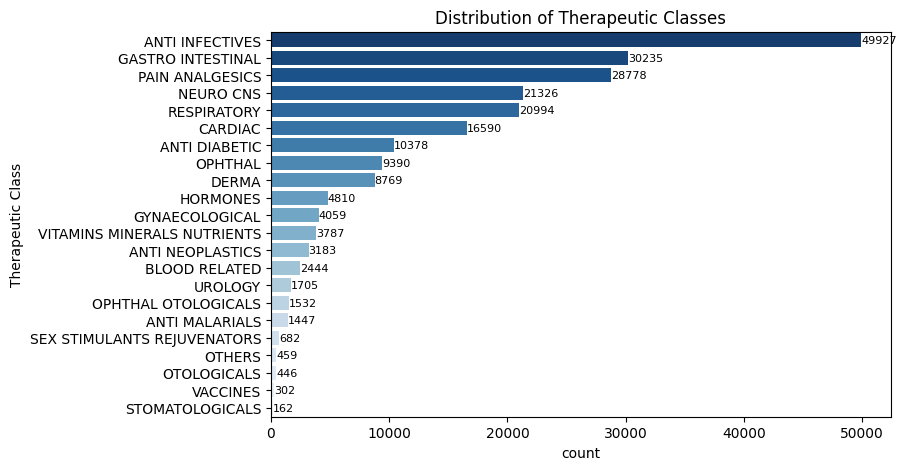

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

ax = sns.countplot(y='Therapeutic Class', data=df,
                   order=df_use['Therapeutic Class'].value_counts().index,
                   palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8)

plt.title('Distribution of Therapeutic Classes')
plt.show()


## Distribusi Variabel Independen

<ipython-input-26-55b77bd718dc>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-26-55b77bd718dc>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-26-55b77bd718dc>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-26-55b77bd718dc>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-26-55b77bd718dc>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

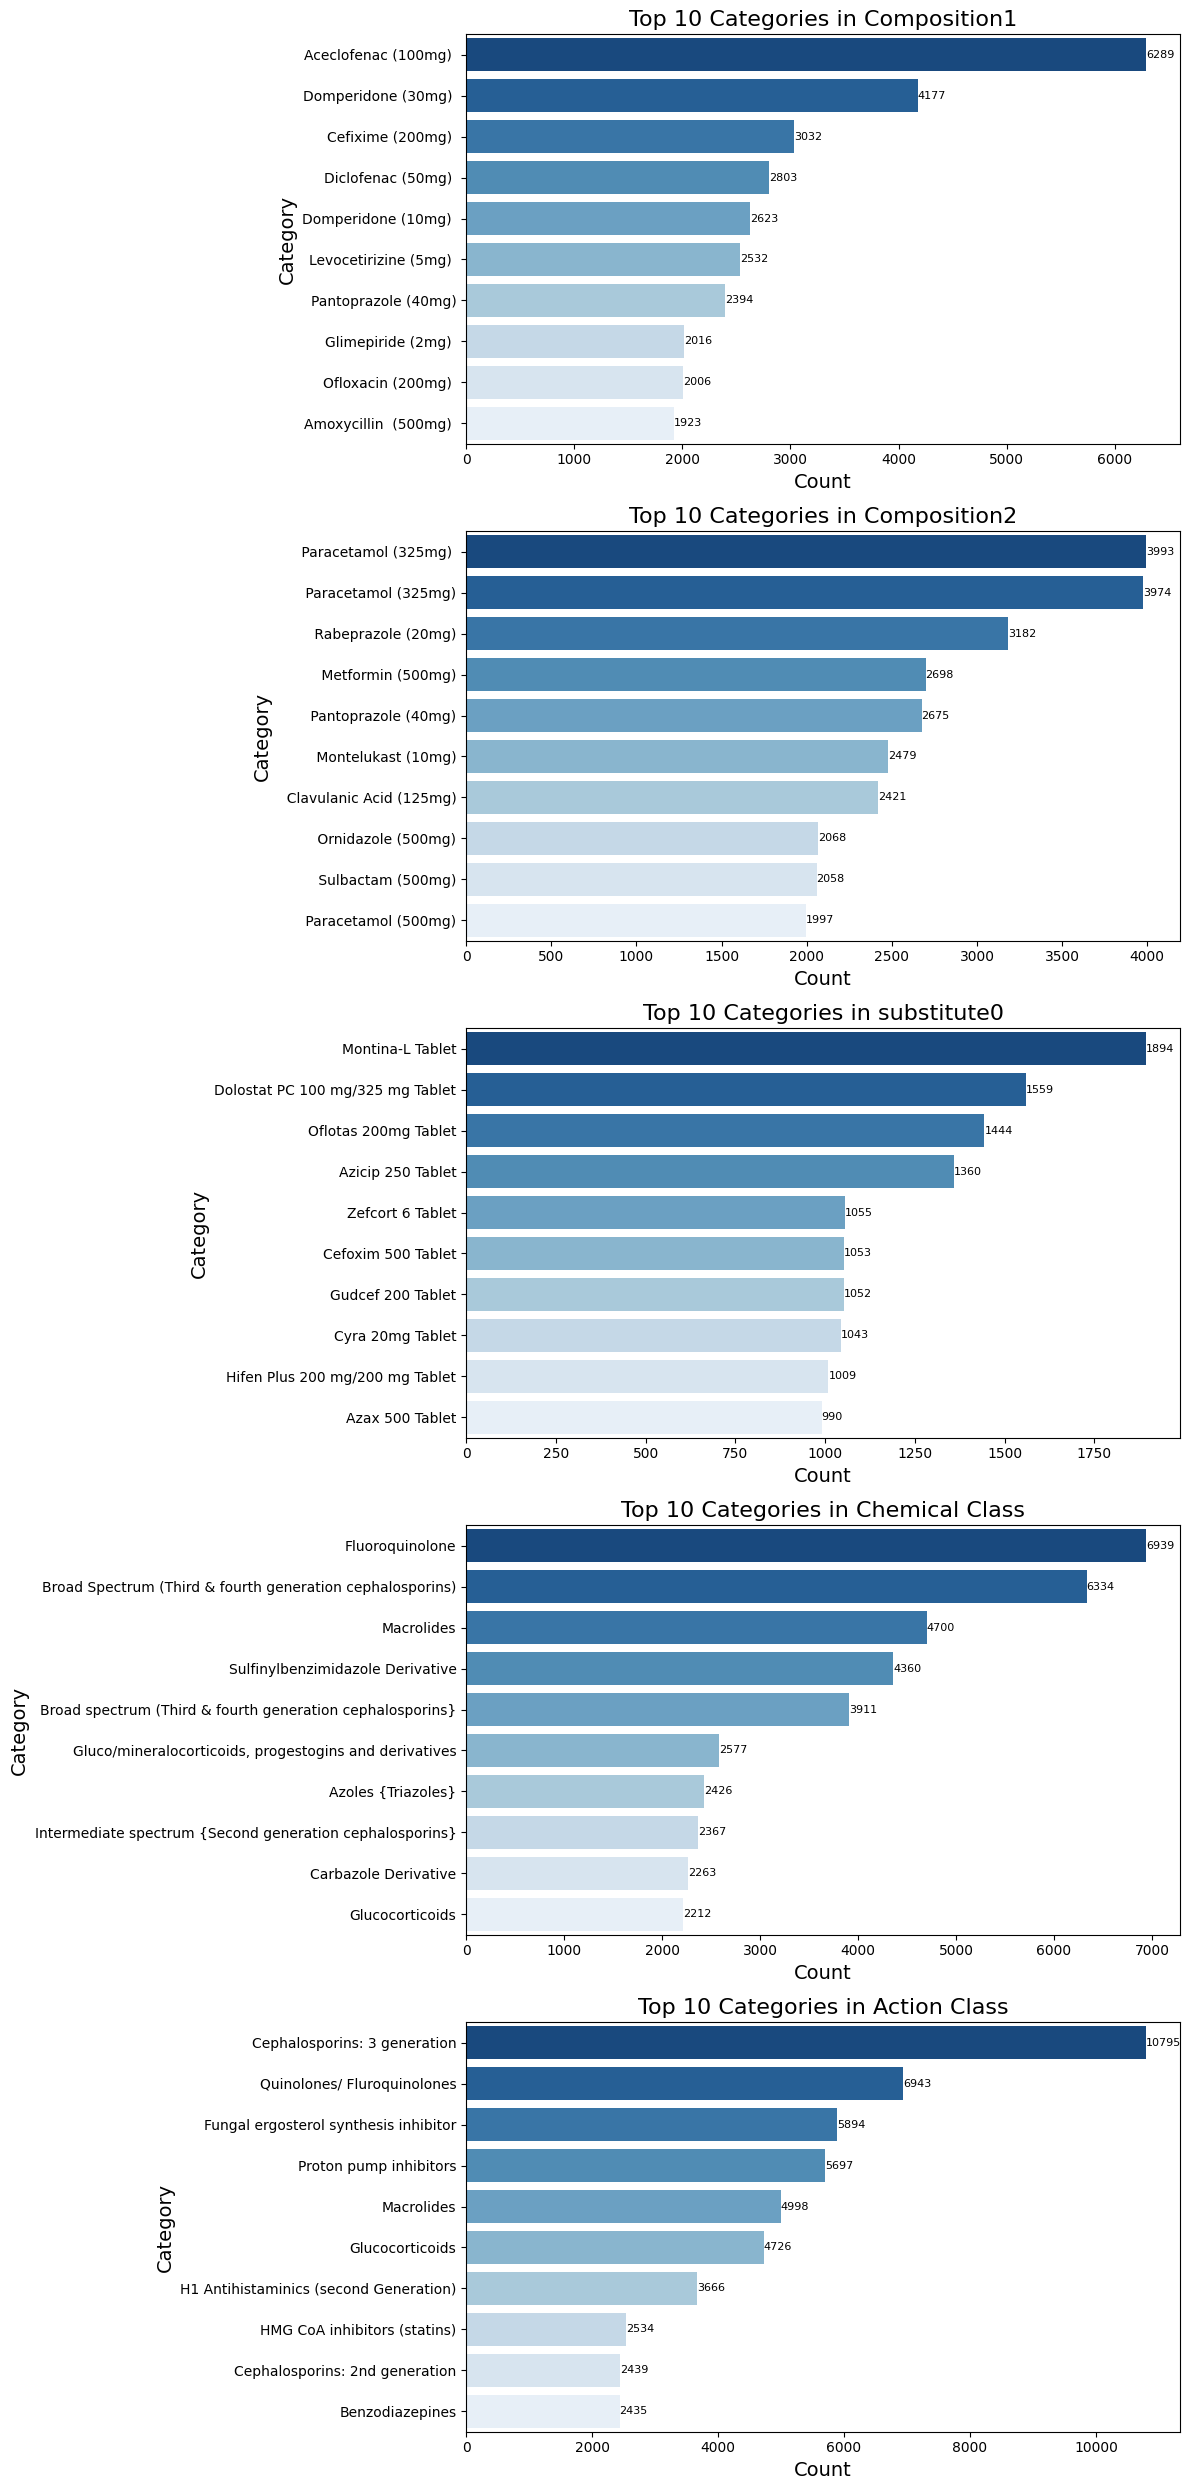

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mendefinisikan jumlah kolom dan menghitung jumlah baris
num_cols = 1  # Mengubah jumlah kolom menjadi 1 untuk tampilan vertikal
num_rows = len(['Composition1', 'Composition2', 'substitute0', 'Chemical Class', 'Action Class'])

# Menentukan ukuran figure; semakin besar num_rows, semakin tinggi plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))  # Lebar 12, tinggi per baris 3

# Looping melalui setiap kolom dan memplot top 10 kategorinya
for i, column in enumerate(['Composition1', 'Composition2', 'substitute0', 'Chemical Class', 'Action Class']):
    top_10_categories = df[column].value_counts().nlargest(10)
    ax = axes[i]

    sns.barplot(x=top_10_categories.values, y=top_10_categories.index, ax=ax, palette='Blues_r') # Menggunakan barplot

    # Menambahkan angka spesifik di setiap bar dengan ukuran font yang lebih kecil
    for j in ax.containers:
        ax.bar_label(j, fmt='%d', fontsize=8)

    ax.set_title(f'Top 10 Categories in {column}', fontsize=16)
    ax.set_xlabel('Count', fontsize=14)
    ax.set_ylabel('Category', fontsize=14)

# Mengatur layout agar tidak overlap
plt.tight_layout()
plt.show()


## Wordcloud dari Komposisi

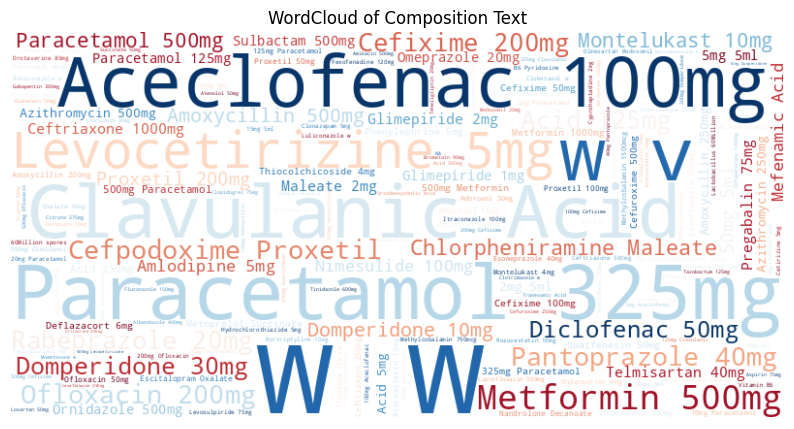

In [ ]:

# Combine all text data from 'short_composition1' and 'short_composition2'
text_data = ' '.join(df['Composition1'].dropna().astype(str)) + ' ' + ' '.join(df['Composition2'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='RdBu_r').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Composition Text')
plt.show()


## Korelasi Antar Variabel dengan Cramer's V

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# Membuat matriks korelasi Cramér's V
categorical_columns = df_use.select_dtypes(include=['object']).columns
cramers_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                              index=categorical_columns,
                              columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_matrix.loc[col1, col2] = cramers_v(df_use[col1], df_use[col2])

# Visualisasi heatmap menggunakan Plotly Express dengan nilai korelasi di dalam plot
fig = px.imshow(cramers_matrix,
                labels=dict(x="", y="", color="Cramér's V"),  # Menghilangkan label axis
                x=categorical_columns,
                y=categorical_columns,
                color_continuous_scale='RdBu',  # Skema warna gradasi
                text_auto=True,  # Menampilkan nilai korelasi di dalam plot
                aspect="equal")  # Menjaga rasio aspek agar kotak-kotak simetris

# Mengatur tampilan layout
fig.update_layout(
    title="Cramér's V Correlation Heatmap",
    title_x=0.5,  # Menempatkan judul di tengah atas
    width=700,  # Sesuaikan agar sama dengan height
    height=700,  # Sesuaikan agar sama dengan width
    xaxis_title=None,
    yaxis_title=None
)

fig.show()


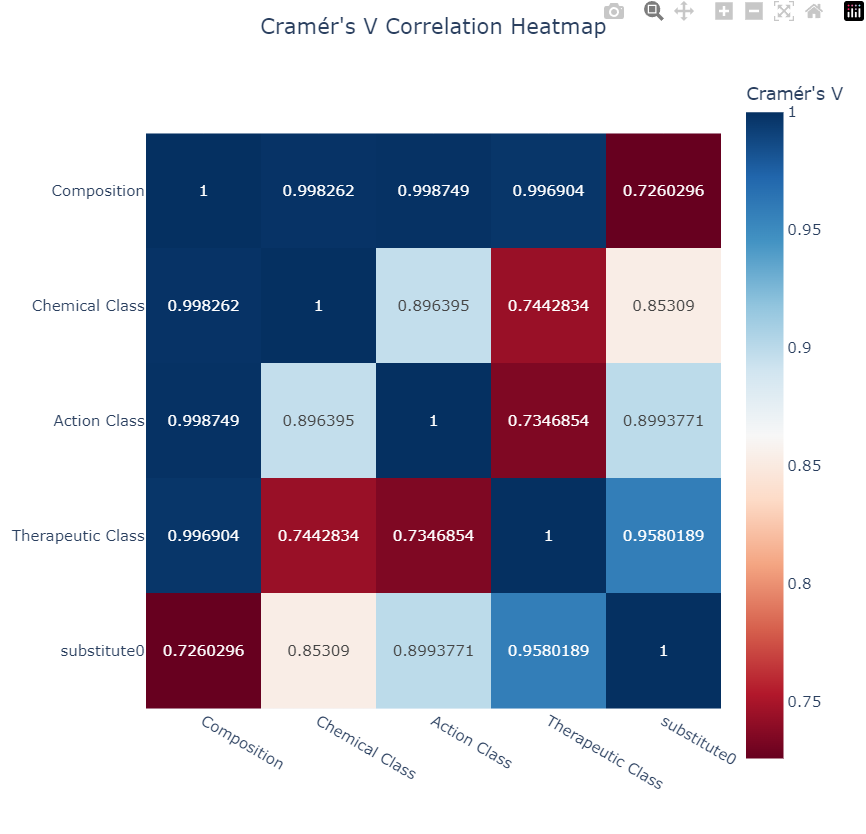

## Total Unique dari Setiap Variabel

<ipython-input-29-557de8c68593>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Unique Category Count', data=unique_counts_df, palette='Blues_r')


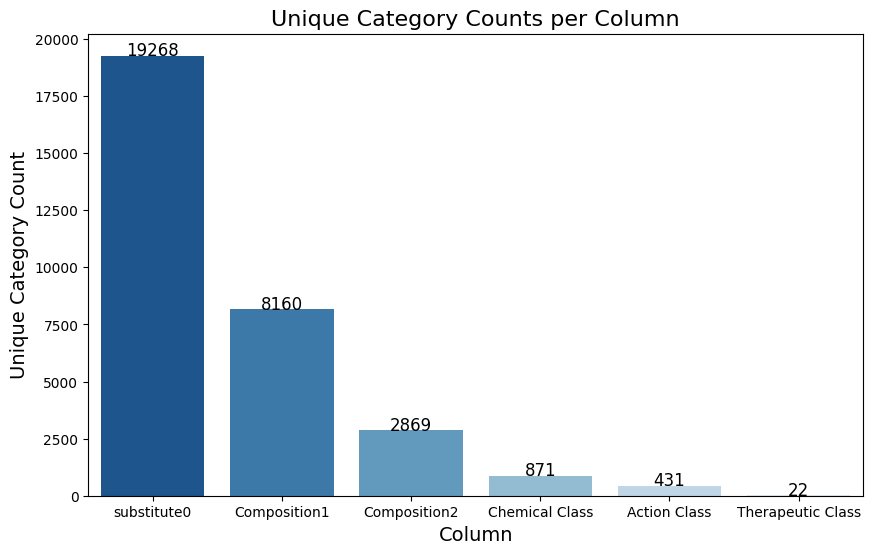

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Menentukan kolom yang akan dihitung jumlah unique categories-nya
columns = ['Composition1', 'Composition2', 'Chemical Class', 'Action Class', 'Therapeutic Class', 'substitute0']

# Membuat dictionary untuk menyimpan hasil count distinct
unique_counts = {column: df[column].nunique() for column in columns}

# Mengubah hasilnya menjadi DataFrame untuk tampilan yang lebih rapi
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Category Count'])

# Mengurutkan DataFrame berdasarkan 'Unique Category Count' dari yang terbesar ke terkecil
unique_counts_df = unique_counts_df.sort_values(by='Unique Category Count', ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Unique Category Count', data=unique_counts_df, palette='Blues_r')

# Menambahkan angka spesifik di setiap bar
for index, value in enumerate(unique_counts_df['Unique Category Count']):
    plt.text(index, value + 5, f'{value}', ha='center', fontsize=12)

plt.title('Unique Category Counts per Column', fontsize=16)
plt.xlabel('Column', fontsize=14)
plt.ylabel('Unique Category Count', fontsize=14)
plt.show()



## Distribusi data setiap Fitur terhadap Kolom Target

In [ ]:
import plotly.express as px
# Menghitung jumlah kemunculan untuk setiap kombinasi Therapeutic Class dan Action Class
df_grouped = df.groupby(['Therapeutic Class', 'Action Class']).size().reset_index(name='Count')

# Membuat scatter plot
fig = px.scatter(df_grouped, x='Therapeutic Class', y='Count', color='Action Class',
                 size='Count', hover_data=['Action Class', 'Count'])

# Mengatur ukuran plot
fig.update_layout(
    width=1200,  # Sesuaikan lebar plot, misalnya 1200 piksel
    height=600   # Anda juga bisa mengatur tinggi plot jika diinginkan
)

# Menampilkan plot
fig.show()

In [ ]:
import plotly.express as px

# Menghitung jumlah kemunculan untuk setiap kombinasi Therapeutic Class dan Chemical Class
df_grouped = df.groupby(['Therapeutic Class', 'Chemical Class']).size().reset_index(name='Count')

# Membuat scatter plot
fig = px.scatter(df_grouped, x='Therapeutic Class', y='Count', color='Chemical Class',
                 size='Count', hover_data=['Chemical Class', 'Count'])

# Mengatur ukuran plot
fig.update_layout(
    width=1200,  # Sesuaikan lebar plot, misalnya 1200 piksel
    height=600   # Anda juga bisa mengatur tinggi plot jika diinginkan
)

# Menampilkan plot
fig.show()


In [ ]:
import plotly.express as px

# Menghitung jumlah kemunculan untuk setiap kombinasi Therapeutic Class dan Composition1
df_grouped = df.groupby(['Therapeutic Class', 'Composition1']).size().reset_index(name='Count')

# Membuat scatter plot
fig = px.scatter(df_grouped, x='Therapeutic Class', y='Count', color='Composition1',
                 size='Count', hover_data=['Composition1', 'Count'],
                 size_max=30)

# Mengatur ukuran chart dan orientasi label sumbu x
fig.update_layout(
    width=1400,  # Sesuaikan lebar chart agar lebih lebar
    height=600,  # Sesuaikan tinggi chart
    xaxis_title='Therapeutic Class',
    yaxis_title='Count',
    xaxis_tickangle=-45  # Mengatur rotasi label agar lebih mudah dibaca
)

# Atau Anda bisa mencoba mengatur orientasi label ke horizontal
# fig.update_layout(xaxis_tickangle=0)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly.express as px

# Menghitung jumlah kemunculan untuk setiap kombinasi Therapeutic Class dan Composition2
df_grouped = df.groupby(['Therapeutic Class', 'Composition2']).size().reset_index(name='Count')

# Membuat scatter plot
fig = px.scatter(df_grouped, x='Therapeutic Class', y='Count', color='Composition2',
                 size='Count', hover_data=['Composition2', 'Count'],
                 size_max=30)

# Mengatur ukuran chart dan orientasi label sumbu x
fig.update_layout(
    width=1200,  # Sesuaikan lebar chart agar lebih lebar
    height=600,  # Sesuaikan tinggi chart
    xaxis_title='Therapeutic Class',
    yaxis_title='Count',
    xaxis_tickangle=-45  # Mengatur rotasi label agar lebih mudah dibaca
)


fig.show()


In [ ]:
import plotly.express as px

# Menghitung jumlah kemunculan untuk setiap kombinasi Therapeutic Class dan substitue0
df_grouped = df.groupby(['Therapeutic Class', 'substitute0']).size().reset_index(name='Count')

# Membuat scatter plot
fig = px.scatter(df_grouped, x='Therapeutic Class', y='Count', color='substitute0',
                 size='Count', hover_data=['substitute0', 'Count'],
                 size_max=20)

# Mengatur ukuran chart dan orientasi label sumbu x
fig.update_layout(
    width=1400,  # Sesuaikan lebar chart agar lebih lebar
    height=600,  # Sesuaikan tinggi chart
    xaxis_title='Therapeutic Class',
    yaxis_title='Count',
    xaxis_tickangle=-45  # Mengatur rotasi label agar lebih mudah dibaca
)

# Atau Anda bisa mencoba mengatur orientasi label ke horizontal
# fig.update_layout(xaxis_tickangle=0)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

## Presentase Missing Value

<ipython-input-20-c18ae14b3ea3>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




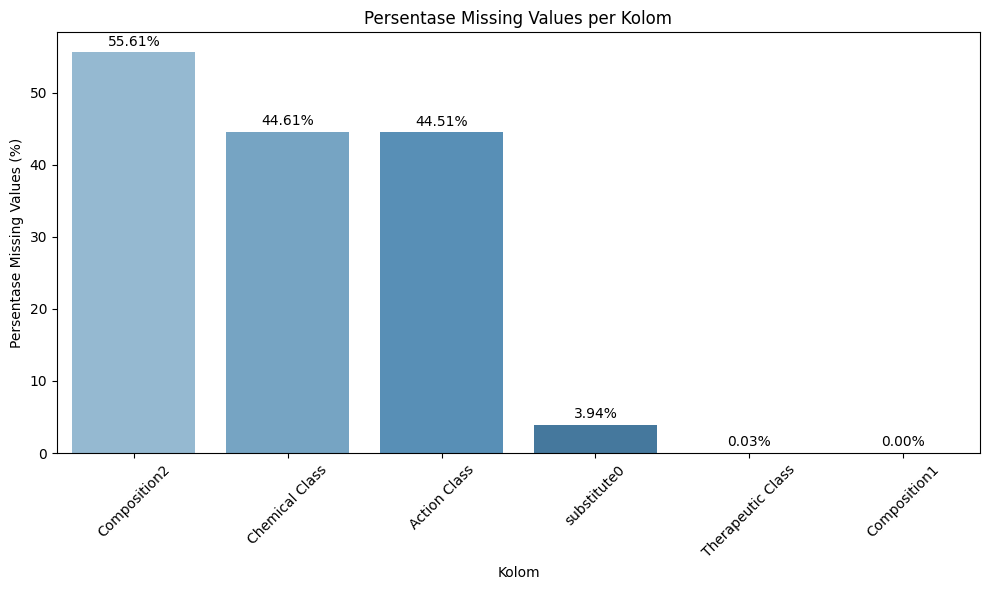

In [ ]:
# Menghitung persentase missing values untuk setiap kolom
missing_percentage = df[['Composition2', 'Chemical Class', 'Action Class', 'substitute0', 'Therapeutic Class', 'Composition1']].isnull().mean() * 100

# Membuat DataFrame dari hasil missing_percentage
missing_df = pd.DataFrame({
    'Kolom': missing_percentage.index,
    'Persentase Missing Values': missing_percentage.values
})

# Mengatur ukuran grafik
plt.figure(figsize=(10, 6))

# Membuat bar chart menggunakan seaborn
sns.barplot(x='Kolom', y='Persentase Missing Values', data=missing_df, palette='Blues_d')

# Menambahkan label persentase di atas masing-masing bar
for index, value in enumerate(missing_df['Persentase Missing Values']):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Menyesuaikan tampilan layout
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing Values (%)')
plt.title('Persentase Missing Values per Kolom')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()

# **Data Modelling**

## Inisisasi Model

In [ ]:
xgb = XGBClassifier(random_state=42)

## Hyperparameter Tunning

In [ ]:
# Ruang pencarian hyperparameter untuk RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 200),           # Jumlah pohon keputusan
    'max_depth': randint(3, 10),                # Kedalaman maksimum setiap pohon
    'learning_rate': uniform(0.01, 0.3),        # Kecepatan belajar
    'subsample': uniform(0.7, 0.3),             # Proporsi data yang digunakan untuk pelatihan
    'colsample_bytree': uniform(0.7, 0.3)       # Proporsi fitur yang digunakan per pohon
}

# RandomizedSearchCV untuk hyperparameter tuning
random_search = RandomizedSearchCV(xgb, param_distributions=param_distributions, n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-1)


## Pelatihan Model

In [ ]:
# Melatih model dengan RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

# Prediksi dengan model terbaik pada data uji
y_pred_test = best_xgb.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


## Metriks Evaluasi

In [ ]:
# Hitung akurasi pada data latih dan uji
accuracy_train = accuracy_score(y_train, best_xgb.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred_test)

# Classification Report
class_report = classification_report(y_test, y_pred_test)

# Metrik lainnya
f1 = f1_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
precision = precision_score(y_test, y_pred_test, average='weighted')


In [ ]:
result = pd.DataFrame({
    'Metrics': ['Accuracy Train', 'Accuracy Test', 'F1 Score', 'Recall', 'Precision'],
    'Value': [accuracy_train, accuracy_test, f1, recall, precision]
})
display(result)

,Metrics,Value
0,Accuracy Train,0.955828
1,Accuracy Test,0.952643
2,F1 Score,0.953033
3,Recall,0.952643
4,Precision,0.957021


## Confussion Matriks


Confusion Matrix:
                 Predicted Class 0  Predicted Class 1  Predicted Class 2  \
Actual Class 0                1887                 84                  0   
Actual Class 1                   0               9854                  0   
Actual Class 2                   0                 13                272   
Actual Class 3                   0                  8                  0   
Actual Class 4                   0                 30                  0   
Actual Class 5                   0                126                  0   
Actual Class 6                   0                175                  0   
Actual Class 7                   0                161                  0   
Actual Class 8                   0                 59                  0   
Actual Class 9                   0                  2                  0   
Actual Class 10                  0                 83                  0   
Actual Class 11                  0                109                

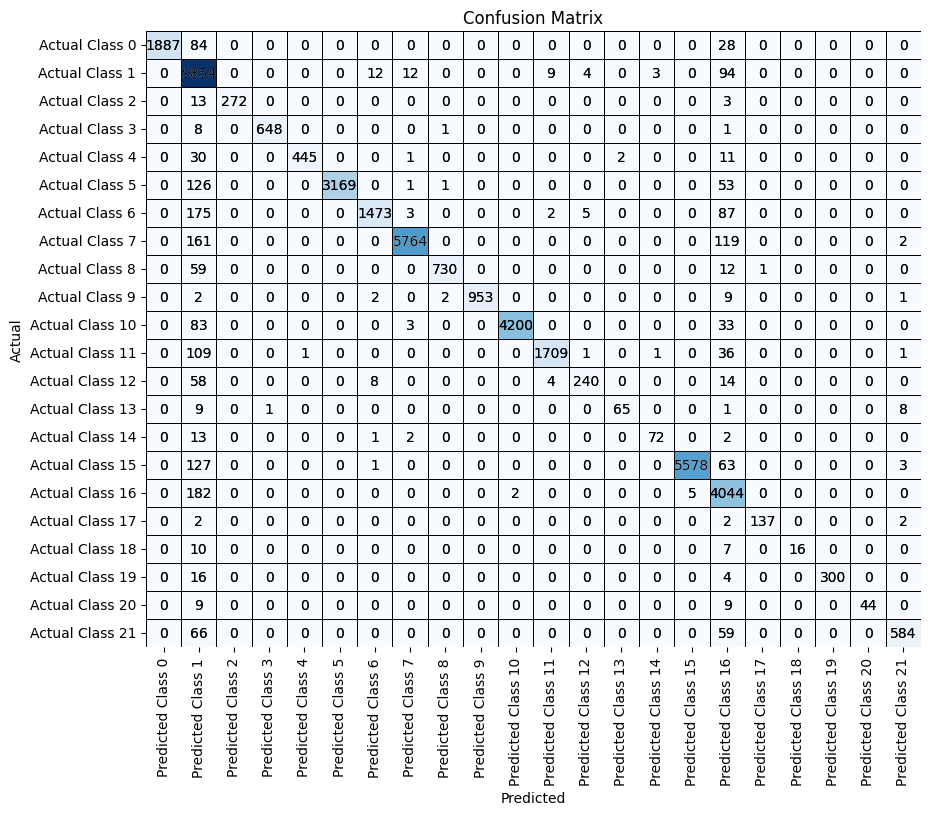

In [ ]:
# Confusion Matrix untuk data uji
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Mendapatkan label kelas unik dari data uji
class_labels = [f'Class {i}' for i in range(len(conf_matrix))]

# Membuat Confusion Matrix sebagai DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=[f'Actual {label}' for label in class_labels],
                              columns=[f'Predicted {label}' for label in class_labels])

# Menampilkan Confusion Matrix sebagai tabel
print("\nConfusion Matrix:")
print(conf_matrix_df)

# Plotting Confusion Matrix menggunakan seaborn untuk visualisasi
plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5, linecolor='black')

# Tambahkan angka pada setiap sel secara manual jika tidak muncul
for i in range(len(conf_matrix_df.columns)):
    for j in range(len(conf_matrix_df.index)):
        ax.text(j + 0.5, i + 0.5, conf_matrix_df.iloc[i, j],
                ha='center', va='center', color='black')

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# **Konklusi dan Rekomendasi**

## Konklusi


1. Pengklasifikasian Therapeutic Class berdasarkan beberapa fitur (Chemical Class, Composition, Action Class, dan Substitute) dengan algoritma XGBoost  meghasilkan akurasi sebesar 0.952643,F1 Score sebesar 0.953033,Precision sebesar 0.957021 dan Recall sebesar 0.952643. Itu artinya pemodelan yang dibangun sudah dapat dikatakan sangat baik dalam proses pengklasifikasiannya
2. Penerapan teknik Random Search dalam tuning hyperparameter serta validasi menggunakan cross validation terbukti efektif dalam meningkatkan performa model dibandingkan dengan pengaturan default, yang terlihat dari peningkatan metrik evaluasi.
3. Akurasi pada data latih didapat sebesar 0.955828 sedangkan pada data uji sebesar 0.952643. Hal ini menunjukkan bahwa permodelan yang dibentuk tidak mengalami overfitting maupun underfitting
4. Pada dataset, unique paling banyak ditemukan pada fitur Substitute dan paling sedikit pada Therapeutic Class oleh karenanya variabel Therapeutic Class memang cocok dijadikan sebagai variabel target

## Rekomendasi

Rekomendasi :

1. Meminimalkan Penggunaan Obat yang Salah, dengan pemahaman yang mendalam tentang komposisi obat melalui fitur-fitur seperti Chemical Class, Composition, dan Action Class, industri farmasi dan kesehatan dapat mengurangi risiko kesalahan dalam pemberian obat. Hal ini penting untuk memastikan pasien menerima obat yang sesuai dengan penyakit yang dideritanya.

2. Rekomendasi dalam pengelompokkan obat sesuai dengan fungsi/therapeutic classnya dalam industri farmasi

3. Model ini dapat digunakan untuk memetakan pengobatan yang sudah ada ke penyakit baru yang memiliki karakteristik serupa. Dengan demikian, jika muncul penyakit baru, rekomendasi pengobatannya dapat segera dilihat berdasarkan kesamaan dengan penyakit yang telah ditangani sebelumnya.

4. Pengembangan dan Penelitian Obat Baru. Data yang dihasilkan dari model ini dapat digunakan sebagai dasar untuk penelitian dan pengembangan obat baru. Dengan memahami fitur-fitur penting yang berpengaruh pada pengobatan, industri farmasi dapat fokus pada pengembangan komposisi obat yang lebih efektif dan aman.

5. Peningkatan Keputusan Klinik Berbasis Data. Model ini bisa menjadi alat bantu dalam pengambilan keputusan klinis berbasis data, memberikan dukungan kepada dokter dan apoteker dalam memilih terapi yang paling sesuai untuk pasien berdasarkan profil penyakit dan komposisi obat.

6. Efisiensi Operasional di Industri.Dengan prediksi yang akurat dari model ini, proses produksi dan distribusi obat dapat dioptimalkan, sehingga dapat menekan biaya produksi dan memastikan ketersediaan obat yang dibutuhkan tepat waktu.